In [1]:
import project_functions as pf
import pandas as pd
import numpy as np
import spacy
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
#preprocess must be before vader_score
#sarcasm_checker must be after vader_score
#date changes must be made before getting daily scores

#pre_process
#vader_score
#epoch_time_convert
#date_shorten
#daily_sentiment
#post_attention_score
#daily_attention
#get_wordcloud
#sarcasm_checker

In [3]:
data = pd.read_csv("/Users/aashrit/Documents/Masters/MY498/Data/Reddit/test.csv")

In [4]:
data['body_pre-processed'] = pf.pre_process(data['body'])

/Users/aashrit/Documents/Masters/MY498/Python Scripts/project_functions.py:49: FutureWarning: The default value of regex will change from True to False in a future version.
  data_clean = data_clean.str.replace('[^\w\s]','')


In [5]:
data['vader_score'] = pf.vader_score(data['body_pre-processed'])

In [6]:
data['created'] = pf.epoch_time_convert(data['created_utc'])

In [7]:
data = pf.date_shorten(data)

/Users/aashrit/Documents/Masters/MY498/Python Scripts/project_functions.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['created'][i] = data['created'][i][:10]


In [8]:
daily_sentiment = pf.daily_sentiment(data,'vader_score')

In [9]:
data['attention_score'] = pf.post_attention_score(data['body_pre-processed'])

In [10]:
daily_attention = pf.daily_attention(data)
daily_attention

{'2022-06-04': 0.03959011648940019,
 '2022-06-05': 0.08347870777274294,
 '2022-06-06': 0.03306335896567885}

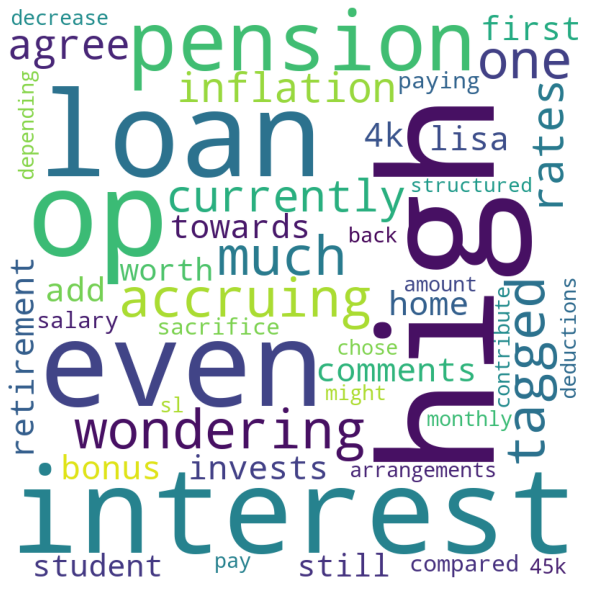

In [11]:
pf.get_wordcloud(data['body'])